In [ ]:
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 14665, done.
remote: Total 14665 (delta 0), reused 0 (delta 0), pack-reused 14665
Receiving objects: 100% (14665/14665), 13.25 MiB | 24.06 MiB/s, done.
Resolving deltas: 100% (9977/9977), done.


In [ ]:
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!make


mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def imShow(path):
    
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()


def download(path):
    from google.colab import files
    files.download(path)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'111915010 (1).pdf'
'111915010 (2).pdf'
 111915010.pdf
 15988500625618715287573277016721.jpg
 15988509347073151197973270048772.jpg
 1598851015790442073710869783384.jpg
 15988513132164733153919380423446.jpg
 15988519119692356193226498341149.jpg
 15998928563417258929063963892997.jpg
 16017903380414954936108033841072.jpg
'ada 5.pdf'
'ada assign 2 (1).pdf'
'ada assign 2.docx'
'ada assign 2.pdf'
'ADA ASSIGN 4.pdf'
 Alok_COA_ASSIGN.pdf
'Alok COA FINAL.pdf'
'alok python assign 2.pdf'
'assign 3 ADA.pdf'
'Assignment No 1 (1).gdoc'
'Assignment No 1 (2).gdoc'
'Assignment No 1.gdoc'
'Assignment No 2.gdoc'
 Classroom
'Colab Notebooks'
 darknet-master
'DBMS ASSIGN 1.pdf'
'dbms assign.pdf'
'DBMS LAB ALOK.pdf'
'DocumentAlok Prakash'\''s OneDrive (Personal) 3h ago.webloc'
 file-sample_100kB.doc
 IMG_20200831_101644.jpg
'IMG_20201008_130219 (1).pdf'
 IMG_20201008_130219-converted.pdf
 IMG_20201012_224224__01.jpg
'imgtopdf_generated_2608201700023 (1).pdf'
 imgtopdf_generated_2608201700023.pdf
'imgtopdf_g

In [ ]:
!ls /mydrive/yolov3


darknet53.conv.74  obj	obj.data  obj.names  obj.zip  yolov3_custom.cfg


In [ ]:
!cp /mydrive/yolov3/obj.zip ../


In [ ]:
!unzip ../obj.zip -d data/


Archive:  ../obj.zip
  inflating: data/obj/0.jpg          
  inflating: data/obj/0.txt          
  inflating: data/obj/10.jpg         
  inflating: data/obj/10.txt         
  inflating: data/obj/100.jpg        
  inflating: data/obj/100.txt        
  inflating: data/obj/101.jpg        
  inflating: data/obj/101.txt        
  inflating: data/obj/102.jpg        
  inflating: data/obj/102.txt        
  inflating: data/obj/103.jpg        
  inflating: data/obj/103.txt        
  inflating: data/obj/104.jpg        
  inflating: data/obj/104.txt        
  inflating: data/obj/105.jpg        
  inflating: data/obj/105.txt        
  inflating: data/obj/106.jpg        
  inflating: data/obj/106.txt        
  inflating: data/obj/107.jpg        
  inflating: data/obj/107.txt        
  inflating: data/obj/108.jpg        
  inflating: data/obj/108.txt        
  inflating: data/obj/109.jpg        
  inflating: data/obj/109.txt        
  inflating: data/obj/11.jpg         
  inflating: data/obj/11.txt 

In [ ]:
import glob
import os

current_dir = 'data/obj'
percentage_test = 10;
file_train = open('data/train.txt', 'w')  
file_test = open('data/valid.txt', 'w')
counter = 1  
index_test = round(100 / percentage_test)  
for file in glob.iglob(os.path.join(current_dir, '*.jpg')):  
    title, ext = os.path.splitext(os.path.basename(file))
    if counter == index_test:
        counter = 1
        file_test.write(current_dir + "/" + title + '.jpg' + "\n")
    else:
        file_train.write(current_dir + "/" + title + '.jpg' + "\n")
        counter = counter + 1

In [ ]:
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg


In [ ]:
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74


--2021-01-14 05:37:44--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-01-14 05:37:44--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   562KB/s    in 4m 44s  

2021-01-14 05:42:28 (559 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!cp darknet53.conv.74 /mydrive/yolov3/darknet53.conv.74


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 184446, rewritten_bbox = 0.068855 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.913685), count: 4, class_loss = 0.000403, iou_loss = 0.075621, total_loss = 0.076024 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 184450, rewritten_bbox = 0.068853 % 
v3 (m

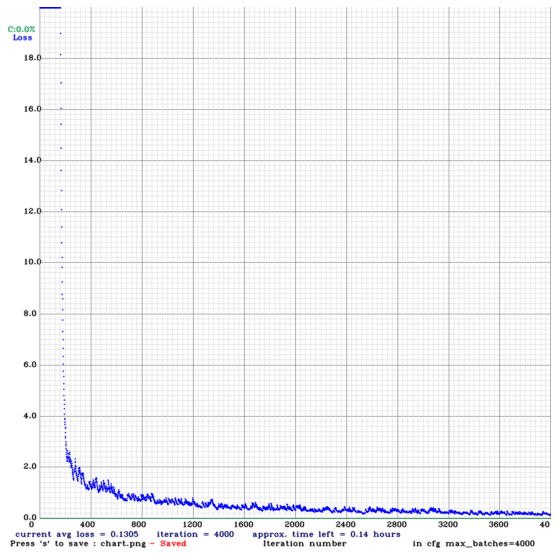

In [ ]:
imShow('chart.png')

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [58]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backups/yolov3_custom_last.weights -dont_show /content/4.jpg -thresh 0.3 -ext_output


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 B

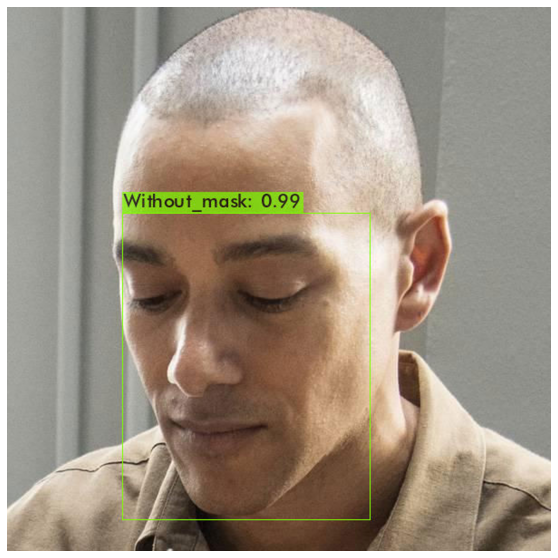

In [56]:
imShow('predictions.jpg')

In [ ]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>